In [1]:
#import modules
# These different modules will help to manipulate and visualize the data 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Start working with the numerical data instead of categorical data
#Save the numerical demographic data 
demo_num = pd.read_csv(r'https://raw.githubusercontent.com/cdhumme/notebooks/master/demographic.csv')
demo_num.drop(demo_num.columns.difference(['RIAGENDR','RIDRETH3', 'DMDEDUC2', 'INDFMPIR', 'INDHHIN2'  ]), 1, inplace=True)

#Education
demo_num ['DMDEDUC2'] = demo_num ['DMDEDUC2'].replace(7,np.NaN)
demo_num ['DMDEDUC2'] = demo_num ['DMDEDUC2'].replace(9,np.NaN)

#Income
demo_num ['INDHHIN2'] = demo_num ['INDHHIN2'].replace(77,np.NaN)
demo_num ['INDHHIN2'] = demo_num ['INDHHIN2'].replace(99,np.NaN)

#Rename the columns
demo_num.columns = [ 'Gender' , 'Race',  'Education',  'Income', 'Poverty']

#Save the numerical questionarre data
quest_num = pd.read_csv(r'https://raw.githubusercontent.com/cdhumme/notebooks/master/questionnaire.csv')

quest_num = quest_num[['DPQ010','DPQ020',
                      'OCQ260', 'OCQ380',
                       'HUQ010', 'HUQ041', 'HUQ051', 'HUQ061', 'HUQ090',
                       'HIQ011'
                      
                      ]]

#General Health Condition
quest_num['HUQ010'] = quest_num['HUQ010'].replace(7, np.NaN)  
quest_num['HUQ010'] = quest_num['HUQ010'].replace(9, np.NaN)


#Type of place to go for healthcare
quest_num['HUQ041'] = quest_num['HUQ041'].replace(77, np.NaN)  

#Number of time received health care over past year
quest_num['HUQ051'] = quest_num['HUQ051'].replace(77, np.NaN)
quest_num['HUQ051'] = quest_num['HUQ051'].replace(99, np.NaN)


#How long since last healthcare visit
quest_num['HUQ061'] = quest_num['HUQ061'].replace(77, np.NaN)
quest_num['HUQ061'] = quest_num['HUQ061'].replace(99, np.NaN)


#Seen mental health professional in last year? 
quest_num['HUQ090'] = quest_num['HUQ090'].replace(9, np.NaN)
quest_num['HUQ090'] = quest_num['HUQ090'].replace(7, np.NaN)

#Description of Job / Work situation
quest_num['OCQ260'] = quest_num['OCQ260'].replace(77, np.NaN)

#Reason not working
quest_num['OCQ380'] = quest_num['OCQ380'].replace(77, np.NaN)  

#Mental Health
quest_num['DPQ010'] = quest_num['DPQ010'].replace(7, np.NaN)  
quest_num['DPQ020'] = quest_num['DPQ020'].replace(9, np.NaN)  

quest_num['HIQ011'] = quest_num['HIQ011'].replace(7, np.NaN)
quest_num['HIQ011'] = quest_num['HIQ011'].replace(9, np.NaN)

quest_num.columns = ['Have Little Interest in Things', 'Feeling Depressed',
                     'job_des' , 'reason_no_work',
                     'Health_Cond', 'routine_plc', 'num_care_yr' , 'last_visit_time' , 'Men_Health_doc?',
                     'Health Insurance?'
                    
                    ]


In [3]:
quest_num

,Have Little Interest in Things,Feeling Depressed,job_des,reason_no_work,Health_Cond,routine_plc,num_care_yr,last_visit_time,Men_Health_doc?,Health Insurance?
0,1.0,0.0,NaN,3.0,2.0,2.0,5.0,NaN,2.0,1.0
1,2.0,0.0,1.0,NaN,4.0,2.0,5.0,NaN,2.0,2.0
2,0.0,0.0,NaN,3.0,3.0,2.0,2.0,NaN,2.0,1.0
3,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0,1.0
4,2.0,1.0,NaN,4.0,5.0,2.0,4.0,NaN,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10170,0.0,0.0,1.0,NaN,4.0,NaN,1.0,NaN,2.0,2.0
10171,NaN,NaN,NaN,NaN,2.0,2.0,0.0,2.0,NaN,2.0
10172,NaN,NaN,1.0,NaN,3.0,2.0,5.0,NaN,2.0,1.0
10173,NaN,NaN,NaN,NaN,1.0,2.0,0.0,2.0,2.0,1.0


In [4]:
quest_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Have Little Interest in Things  5397 non-null   float64
 1   Feeling Depressed               5393 non-null   float64
 2   job_des                         3439 non-null   float64
 3   reason_no_work                  2815 non-null   float64
 4   Health_Cond                     10170 non-null  float64
 5   routine_plc                     8980 non-null   float64
 6   num_care_yr                     10164 non-null  float64
 7   last_visit_time                 1281 non-null   float64
 8   Men_Health_doc?                 9005 non-null   float64
 9   Health Insurance?               10164 non-null  float64
dtypes: float64(10)
memory usage: 795.0 KB


In [5]:
demo_num

,Gender,Race,Education,Income,Poverty
0,1,4,3.0,4.0,0.84
1,1,3,3.0,7.0,1.78
2,1,3,4.0,10.0,4.51
3,1,3,NaN,9.0,2.52
4,2,3,5.0,15.0,5.00
...,...,...,...,...,...
10170,1,2,5.0,NaN,NaN
10171,2,1,NaN,8.0,1.95
10172,2,4,5.0,7.0,3.66
10173,1,2,NaN,6.0,1.05


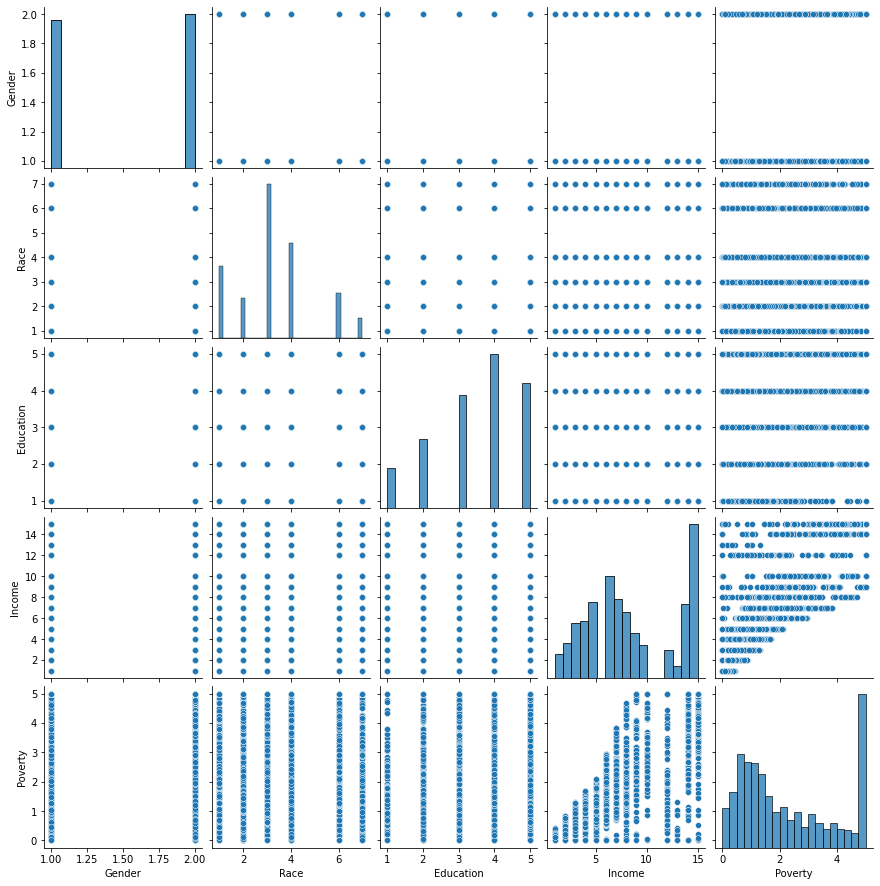

In [6]:
grid = sns.pairplot(demo_num)

In [7]:
corr_matrix_demo = demo_num.corr()
corr_matrix_demo

,Gender,Race,Education,Income,Poverty
Gender,1.000000,-0.011942,0.024371,-0.031350,-0.026321
Race,-0.011942,1.000000,0.252468,0.115364,0.147863
Education,0.024371,0.252468,1.000000,0.399865,0.476728
Income,-0.031350,0.115364,0.399865,1.000000,0.893662
Poverty,-0.026321,0.147863,0.476728,0.893662,1.000000


In [8]:
corr_matrix_quest = quest_num.corr()
corr_matrix_quest

,Have Little Interest in Things,Feeling Depressed,job_des,reason_no_work,Health_Cond,routine_plc,num_care_yr,last_visit_time,Men_Health_doc?,Health Insurance?
Have Little Interest in Things,1.000000,0.500969,0.000864,0.134361,0.235011,-0.048727,0.137424,-0.031368,-0.138999,0.023614
Feeling Depressed,0.500969,1.000000,-0.014146,0.156036,0.268783,-0.030098,0.128362,-0.050274,-0.168585,0.042198
job_des,0.000864,-0.014146,1.000000,NaN,-0.039008,0.005199,0.059145,-0.003701,0.010267,-0.046488
reason_no_work,0.134361,0.156036,NaN,1.000000,0.207270,0.025963,0.154157,0.173422,-0.187279,-0.017318
Health_Cond,0.235011,0.268783,-0.039008,0.207270,1.000000,-0.023136,0.204661,0.073124,-0.103501,0.140661
routine_plc,-0.048727,-0.030098,0.005199,0.025963,-0.023136,1.000000,0.012501,0.040382,0.002560,0.000898
num_care_yr,0.137424,0.128362,0.059145,0.154157,0.204661,0.012501,1.000000,NaN,-0.179851,-0.210414
last_visit_time,-0.031368,-0.050274,-0.003701,0.173422,0.073124,0.040382,NaN,1.000000,0.081857,0.216820
Men_Health_doc?,-0.138999,-0.168585,0.010267,-0.187279,-0.103501,0.002560,-0.179851,0.081857,1.000000,0.054220
Health Insurance?,0.023614,0.042198,-0.046488,-0.017318,0.140661,0.000898,-0.210414,0.216820,0.054220,1.000000


In [54]:
income = demo_num[['Income']]
health_cond = quest_num[['Health_Cond', 'routine_plc', 'num_care_yr' , 'last_visit_time' , 'Men_Health_doc?',
                     'Health Insurance?']]
income_vs_care = income.join(health_cond)

In [55]:
income_vs_care

,Income,Health_Cond,routine_plc,num_care_yr,last_visit_time,Men_Health_doc?,Health Insurance?
0,4.0,2.0,2.0,5.0,NaN,2.0,1.0
1,7.0,4.0,2.0,5.0,NaN,2.0,2.0
2,10.0,3.0,2.0,2.0,NaN,2.0,1.0
3,9.0,2.0,NaN,1.0,NaN,2.0,1.0
4,15.0,5.0,2.0,4.0,NaN,2.0,1.0
...,...,...,...,...,...,...,...
10170,NaN,4.0,NaN,1.0,NaN,2.0,2.0
10171,8.0,2.0,2.0,0.0,2.0,NaN,2.0
10172,7.0,3.0,2.0,5.0,NaN,2.0,1.0
10173,6.0,1.0,2.0,0.0,2.0,2.0,1.0


In [56]:
income_vs_care_corr = income_vs_care.corr()
income_vs_care_corr

,Income,Health_Cond,routine_plc,num_care_yr,last_visit_time,Men_Health_doc?,Health Insurance?
Income,1.000000,-0.175289,0.072281,-0.036801,-0.025779,0.065162,-0.157179
Health_Cond,-0.175289,1.000000,-0.023136,0.204661,0.073124,-0.103501,0.140661
routine_plc,0.072281,-0.023136,1.000000,0.012501,0.040382,0.002560,0.000898
num_care_yr,-0.036801,0.204661,0.012501,1.000000,NaN,-0.179851,-0.210414
last_visit_time,-0.025779,0.073124,0.040382,NaN,1.000000,0.081857,0.216820
Men_Health_doc?,0.065162,-0.103501,0.002560,-0.179851,0.081857,1.000000,0.054220
Health Insurance?,-0.157179,0.140661,0.000898,-0.210414,0.216820,0.054220,1.000000


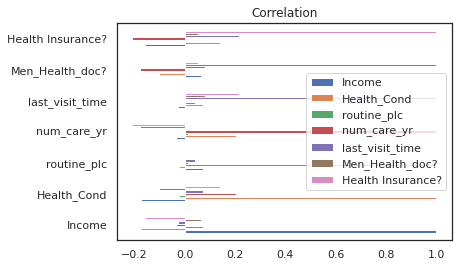

In [57]:
income_vs_care_plot = income_vs_care_corr.plot.barh(title='Correlation')

# Prediction Time

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [59]:
income_vs_care = income_vs_care.drop('last_visit_time', axis = 1)
income_vs_care = income_vs_care.dropna()
income_vs_care


,Income,Health_Cond,routine_plc,num_care_yr,Men_Health_doc?,Health Insurance?
0,4.0,2.0,2.0,5.0,2.0,1.0
1,7.0,4.0,2.0,5.0,2.0,2.0
2,10.0,3.0,2.0,2.0,2.0,1.0
4,15.0,5.0,2.0,4.0,2.0,1.0
5,9.0,5.0,1.0,3.0,2.0,1.0
...,...,...,...,...,...,...
10168,6.0,1.0,2.0,2.0,2.0,1.0
10169,9.0,4.0,1.0,2.0,2.0,2.0
10172,7.0,3.0,2.0,5.0,2.0,1.0
10173,6.0,1.0,2.0,0.0,2.0,1.0


In [60]:
income_vs_care['X'] = range(0,7483)

In [61]:
income_vs_care

,Income,Health_Cond,routine_plc,num_care_yr,Men_Health_doc?,Health Insurance?,X
0,4.0,2.0,2.0,5.0,2.0,1.0,0
1,7.0,4.0,2.0,5.0,2.0,2.0,1
2,10.0,3.0,2.0,2.0,2.0,1.0,2
4,15.0,5.0,2.0,4.0,2.0,1.0,3
5,9.0,5.0,1.0,3.0,2.0,1.0,4
...,...,...,...,...,...,...,...
10168,6.0,1.0,2.0,2.0,2.0,1.0,7478
10169,9.0,4.0,1.0,2.0,2.0,2.0,7479
10172,7.0,3.0,2.0,5.0,2.0,1.0,7480
10173,6.0,1.0,2.0,0.0,2.0,1.0,7481


In [62]:
income_vs_care = income_vs_care.set_index('X')


In [63]:
features = income_vs_care[['Income','Health_Cond', 'routine_plc', 'Men_Health_doc?', 'Health Insurance?']]
target = income_vs_care['num_care_yr']



In [64]:
#for index, value in target.items():
#    if value <= 2.0:
#        target[index] = 0
#    elif value > 2:
#        target[index] = 1
    

    

In [65]:
target.dtype

dtype('float64')

In [66]:
target = income_vs_care['num_care_yr'].astype(np.int)
target = target.astype('category')

In [67]:
target

X
0       5
1       5
2       2
3       4
4       3
       ..
7478    2
7479    2
7480    5
7481    0
7482    1
Name: num_care_yr, Length: 7483, dtype: category
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]

In [68]:
income_vs_care

,Income,Health_Cond,routine_plc,num_care_yr,Men_Health_doc?,Health Insurance?
X,,,,,,
0,4.0,2.0,2.0,5.0,2.0,1.0
1,7.0,4.0,2.0,5.0,2.0,2.0
2,10.0,3.0,2.0,2.0,2.0,1.0
3,15.0,5.0,2.0,4.0,2.0,1.0
4,9.0,5.0,1.0,3.0,2.0,1.0
...,...,...,...,...,...,...
7478,6.0,1.0,2.0,2.0,2.0,1.0
7479,9.0,4.0,1.0,2.0,2.0,2.0
7480,7.0,3.0,2.0,5.0,2.0,1.0


In [69]:
features

,Income,Health_Cond,routine_plc,Men_Health_doc?,Health Insurance?
X,,,,,
0,4.0,2.0,2.0,2.0,1.0
1,7.0,4.0,2.0,2.0,2.0
2,10.0,3.0,2.0,2.0,1.0
3,15.0,5.0,2.0,2.0,1.0
4,9.0,5.0,1.0,2.0,1.0
...,...,...,...,...,...
7478,6.0,1.0,2.0,2.0,1.0
7479,9.0,4.0,1.0,2.0,2.0
7480,7.0,3.0,2.0,2.0,1.0


In [70]:
features.isna().sum()

Income               0
Health_Cond          0
routine_plc          0
Men_Health_doc?      0
Health Insurance?    0
dtype: int64

In [71]:
target

X
0       5
1       5
2       2
3       4
4       3
       ..
7478    2
7479    2
7480    5
7481    0
7482    1
Name: num_care_yr, Length: 7483, dtype: category
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]

In [73]:
df = pd.concat([features, target], axis=1)
df

,Income,Health_Cond,routine_plc,Men_Health_doc?,Health Insurance?,num_care_yr
X,,,,,,
0,4.0,2.0,2.0,2.0,1.0,5
1,7.0,4.0,2.0,2.0,2.0,5
2,10.0,3.0,2.0,2.0,1.0,2
3,15.0,5.0,2.0,2.0,1.0,4
4,9.0,5.0,1.0,2.0,1.0,3
...,...,...,...,...,...,...
7478,6.0,1.0,2.0,2.0,1.0,2
7479,9.0,4.0,1.0,2.0,2.0,2
7480,7.0,3.0,2.0,2.0,1.0,5


In [28]:
#df['Health_Cond'] = income_vs_care['Health_Cond'].astype(float)
#df['Health Insurance?']= income_vs_care['Health Insurance?'].astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7482
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Income             7483 non-null   float64 
 1   Health_Cond        7483 non-null   float64 
 2   routine_plc        7483 non-null   float64 
 3   Men_Health_doc?    7483 non-null   float64 
 4   Health Insurance?  7483 non-null   float64 
 5   num_care_yr        7483 non-null   category
dtypes: category(1), float64(5)
memory usage: 358.5 KB


In [30]:
df.isna().sum()

Income               0
Health_Cond          0
routine_plc          0
Men_Health_doc?      0
Health Insurance?    0
num_care_yr          0
dtype: int64

In [31]:
print(df)

      Income  Health_Cond  routine_plc  Men_Health_doc?  Health Insurance?  \
X                                                                            
0        4.0          2.0          2.0              2.0                1.0   
1        7.0          4.0          2.0              2.0                2.0   
2       10.0          3.0          2.0              2.0                1.0   
3       15.0          5.0          2.0              2.0                1.0   
4        9.0          5.0          1.0              2.0                1.0   
...      ...          ...          ...              ...                ...   
7478     6.0          1.0          2.0              2.0                1.0   
7479     9.0          4.0          1.0              2.0                2.0   
7480     7.0          3.0          2.0              2.0                1.0   
7481     6.0          1.0          2.0              2.0                1.0   
7482    15.0          2.0          2.0              2.0         

In [75]:
from collections import defaultdict
train_accuracy = defaultdict(list)
test_accuracy = defaultdict(list)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from collections import defaultdict


perf_measures = defaultdict(dict)
experiment_id = 0

X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=1)

for depth in range(2,8):
    clf = DecisionTreeClassifier(max_depth = depth)
    _ = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    perf_measures[depth]['accuracy'] = accuracy_score(y_test, y_test_pred, normalize=True)
    
    
#perf_measures[experiment_id]['train_accuracy'] = clf.score(X_train, y_train)
#perf_measures[experiment_id]['test_accuracy'] = clf.score(X_test, y_test)
#perf_measures[experiment_id]['f1_score'] = f1_score(y_test, y_test_pred)
#perf_measures[experiment_id]['precision'] = precision_score(y_test, y_test_pred)
#perf_measures[experiment_id]['recall'] = recall_score(y_test, y_test_pred)

# df_accuracy = pd.DataFrame(perf_measures).T
# df_accuracy = df_accuracy[['model', 'precision','f1_score', 'recall', 'test_accuracy', 'train_accuracy']]
# df_accuracy

In [86]:
df_accuracy = pd.DataFrame(perf_measures).T
print(df_accuracy)

   accuracy
2  0.328657
3  0.334001
4  0.335337
5  0.337341
6  0.338009
7  0.335337


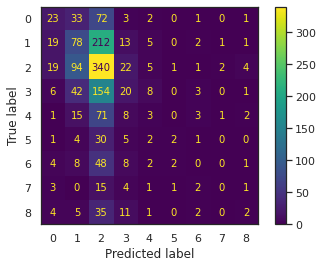

In [81]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels = [f'{i}' for i in range(0 , 9)])

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred, normalize=True)

0.312625250501002

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.426809 to fit



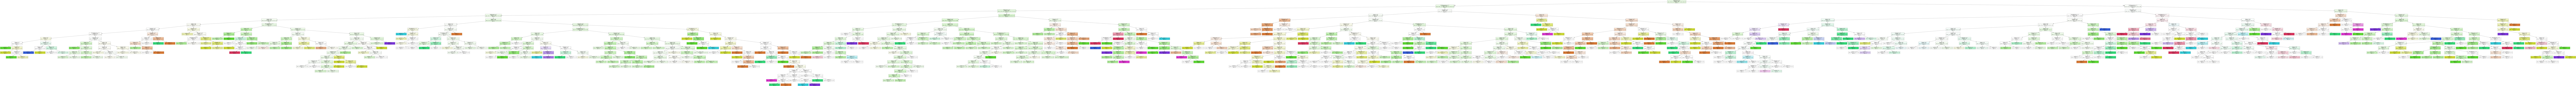

In [84]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

tree_file = 'tree01.dot'
labels = [f'{i}' for i in range(0 , 9)]
export_graphviz(clf, out_file = tree_file, class_names = labels, feature_names = features.columns, impurity = False, filled = True )
graph = pydotplus.graph_from_dot_file(tree_file)
Image(graph.create_png())

In [35]:
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

perf_measures = defaultdict(dict)

clf = DecisionTreeClassifier()

experiment_id = 0
for test_size in [0.2, 0.25, 0.3]:
    for i, random_state in enumerate(np.random.randint(1, size=30)):
        experiment_id = experiment_id + 1
# YOUR CODE HERE
        X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target, test_size = test_size, random_state = random_state)
        _ = clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        
        perf_measures[experiment_id]['test_size'] = float(test_size)
        perf_measures[experiment_id]['run#'] = i
        perf_measures[experiment_id]['train_accuracy'] = clf.score(X_train, y_train)
        perf_measures[experiment_id]['test_accuracy'] = clf.score(X_test, y_test)
        perf_measures[experiment_id]['f1_score'] = f1_score(y_test, y_test_pred)
        perf_measures[experiment_id]['precision'] = precision_score(y_test, y_test_pred)
        perf_measures[experiment_id]['recall'] = recall_score(y_test, y_test_pred)
        
df_accuracy = pd.DataFrame(perf_measures).T
df_accuracy = df_accuracy[['test_size', 'run#', 'precision', 'recall', 'f1_score', 'test_accuracy', 'train_accuracy']]
df_accuracy.head(5)

,test_size,run#,precision,recall,f1_score,test_accuracy,train_accuracy
1,0.2,0.0,0.600000,0.281768,0.383459,0.671343,0.715169
2,0.2,1.0,0.598425,0.279926,0.381430,0.670675,0.715169
3,0.2,2.0,0.598425,0.279926,0.381430,0.670675,0.715169
4,0.2,3.0,0.598425,0.279926,0.381430,0.670675,0.715169
5,0.2,4.0,0.600000,0.281768,0.383459,0.671343,0.715169


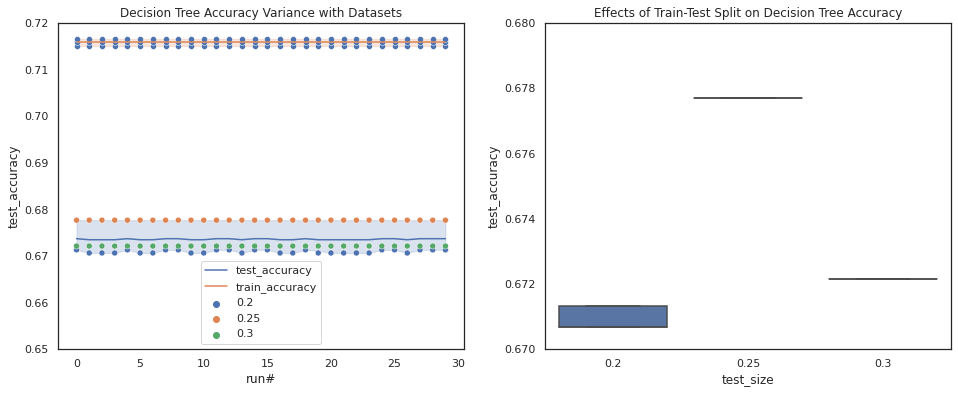

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

_ = sns.lineplot(x=df_accuracy['run#'], y=df_accuracy['test_accuracy'],  label='test_accuracy', ax=ax[0])
_ = sns.lineplot(x=df_accuracy['run#'], y=df_accuracy['train_accuracy'], label='train_accuracy', ax=ax[0])
_ = sns.scatterplot(x=df_accuracy['run#'], y=df_accuracy['train_accuracy'], ax=ax[0])
_ = sns.scatterplot(x=df_accuracy['run#'], y=df_accuracy['test_accuracy'], hue=df_accuracy['test_size'], 
                    palette="deep", legend='auto', ax=ax[0])
_ = ax[0].legend(loc='lower center')
_ = ax[0].set_ylim(0.65, 0.72)
_ = ax[0].set_title('Decision Tree Accuracy Variance with Datasets')

_ = sns.boxplot(x='test_size', y='test_accuracy', data=df_accuracy, ax=ax[1])
_ = ax[1].set_ylim(0.67, 0.68)
_ = ax[1].set_title('Effects of Train-Test Split on Decision Tree Accuracy')
plt.show()

In [37]:
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

perf_measures = defaultdict(dict)

test_size = 0.25

experiment_id = 0
for i,r in enumerate(np.random.randint(1, size = 30)):
    for max_depth in [3,4,5,8]:
        experiment_id = experiment_id + 1
        
        clf = DecisionTreeClassifier(max_depth = max_depth)
        X_train, X_test, y_train, y_test = train_test_split(features, target, stratify = target, test_size = test_size, random_state = r)
        _ = clf.fit(X_train, y_train)
        y_test_pred = clf.predict(X_test)
        
        perf_measures[experiment_id]['max_depth'] = max_depth
        perf_measures[experiment_id]['run#'] = i
        perf_measures[experiment_id]['train_accuracy'] = clf.score(X_train, y_train)
        perf_measures[experiment_id]['test_accuracy'] = clf.score(X_test, y_test)
        perf_measures[experiment_id]['f1_score'] = f1_score(y_test, y_test_pred)
        perf_measures[experiment_id]['precision'] = precision_score(y_test, y_test_pred)
        perf_measures[experiment_id]['recall'] = recall_score(y_test, y_test_pred)
        
df_accuracy = pd.DataFrame(perf_measures).T

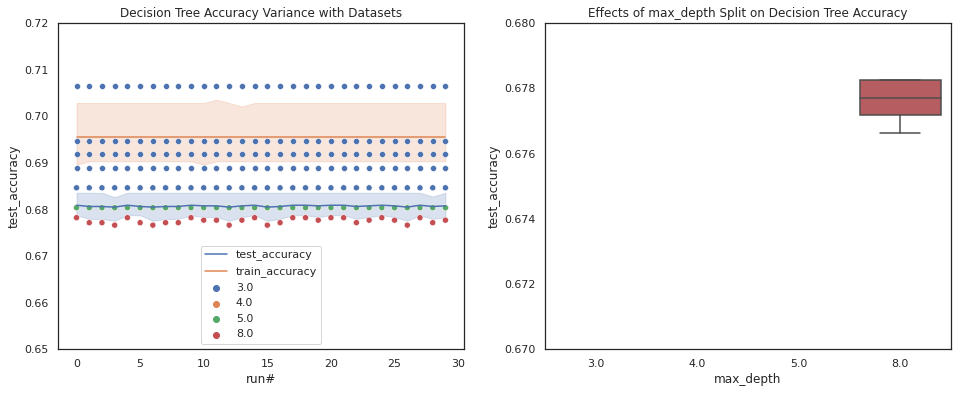

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

_ = sns.lineplot(x=df_accuracy['run#'], y=df_accuracy['test_accuracy'],  label='test_accuracy', ax=ax[0])
_ = sns.lineplot(x=df_accuracy['run#'], y=df_accuracy['train_accuracy'], label='train_accuracy', ax=ax[0])
_ = sns.scatterplot(x=df_accuracy['run#'], y=df_accuracy['train_accuracy'], ax=ax[0])
_ = sns.scatterplot(x=df_accuracy['run#'], y=df_accuracy['test_accuracy'], hue=df_accuracy['max_depth'], 
                    palette="deep", legend='auto', ax=ax[0])
_ = ax[0].legend(loc='lower center')
_ = ax[0].set_ylim(0.65, 0.72)
_ = ax[0].set_title('Decision Tree Accuracy Variance with Datasets')

_ = sns.boxplot(x='max_depth', y='test_accuracy', data=df_accuracy, ax=ax[1])
_ = ax[1].set_ylim(0.67, 0.68)
_ = ax[1].set_title('Effects of max_depth Split on Decision Tree Accuracy')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")


from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from time import time 
from sklearn.svm import SVC
from collections import defaultdict
from sklearn.preprocessing import StandardScaler


def evaluate_model(clf, label, perf_data = defaultdict(dict), nrepeats=1, test_size=0.25):
    '''evaluate_model assesses the model performance with several splits from a feature matrix and target vector
    
     Parameters
     ---------
        clf: ClassifierMixin
            a classifier to be assessed
        label: string
            the name of the classifier
        perf_data: defaultdict(dict), optional
            a dict that stores the performance data
        test_size: float, optional
            a real number in the range (0, 1.0) that controls the size of train set and test set
        nrepeats: int, optional
            the number of runs for each model
     
     Returns
     ---------
         perf_data: defaultdict(dict)
    '''
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=1)
    experiment_id = len(perf_data)
    #clf = DecisionTreeClassifier()
    _ = clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    perf_measures[label]['accuracy'] = accuracy_score(y_test, y_test_pred, normalize=True)
    experiment_id = experiment_id + 1
    return perf_data

#define models

models = {
#     'RandomForest': RandomForestClassifier(), 
#     'SVC': SVC(gamma = 'auto'),
#     'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors = 5),
#     'LogisticRegression': LogisticRegression(fit_intercept = True, max_iter = 5000),
#     'AdaBoost': AdaBoostClassifier(n_estimators = 100, random_state = 0),
#     'MLP': MLPClassifier(hidden_layer_sizes = 3, random_state = 1, max_iter=1000),
#     'DecisionTree': DecisionTreeClassifier(max_depth = 6) 
}

model_perf_data = defaultdict(dict)

for label, clf in models.items():
    _ = evaluate_model(clf, label, model_perf_data, nrepeats = 30) 
    
df_perf = pd.DataFrame(model_perf_data).T

In [40]:
# YOUR CODE HERE
perf_col = ['test_accuracy', 'f1_score', 'precision', 'recall', 'train_time', 'inference_time']

for col in perf_col:
    df_perf[col] = df_perf[col].astype(np.float)


df_perf.groupby('model').agg('mean').sort_values('test_accuracy', ascending = False)

,test_accuracy,f1_score,precision,recall,train_time,inference_time
model,,,,,,
AdaBoost,0.689400,0.432039,0.642686,0.325675,0.443672,0.063293
LogisticRegression,0.688473,0.418549,0.648936,0.309131,0.047599,0.001902
MLP,0.688224,0.413543,0.655710,0.303780,2.168623,0.002819
SVC,0.687600,0.393945,0.666344,0.279971,1.707789,0.278180
GaussianNB,0.687386,0.443859,0.626376,0.343937,0.003801,0.002129
DecisionTree,0.684001,0.412076,0.634959,0.305596,0.004630,0.001956
RandomForest,0.676964,0.415049,0.606148,0.316102,0.409174,0.046984
KNN,0.644308,0.444666,0.516405,0.394158,0.010281,0.142952


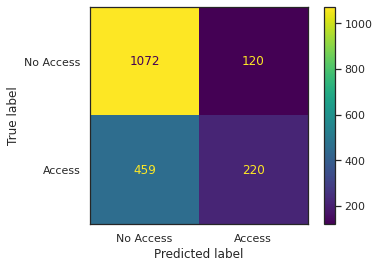

In [41]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, display_labels = ['No Access', 'Access'])